## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

## 條件設定
- epochs = 500
- optimizer = Adam

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
x_train.shape

(50000, 3072)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    InputLayer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(InputLayer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[InputLayer], output=[out])

    return model
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


/Users/Wei-Po/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # This is added back by InteractiveShellApp.init_path()


In [6]:
"""
Compile 模型
"""
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 24s 478us/step - loss: 1.9372 - accuracy: 0.3028 - val_loss: 1.7702 - val_accuracy: 0.3606
Epoch 2/500
50000/50000 [==============================] - 17s 339us/step - loss: 1.7124 - accuracy: 0.3879 - val_loss: 1.6893 - val_accuracy: 0.3933
Epoch 3/500
50000/50000 [==============================] - 17s 340us/step - loss: 1.6201 - accuracy: 0.4212 - val_loss: 1.6079 - val_accuracy: 0.4222
Epoch 4/500
50000/50000 [==============================] - 14s 284us/step - loss: 1.5671 - accuracy: 0.4439 - val_loss: 1.6913 - val_accuracy: 0.4002
Epoch 5/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.5142 - accuracy: 0.4601 - val_loss: 1.5113 - val_accuracy: 0.4548
Epoch 6/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.4661 - accuracy: 0.4773 - val_loss: 1.5055 - val_accuracy: 0.4629
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.5646 - accuracy: 0.7992 - val_loss: 2.0147 - val_accuracy: 0.5079
Epoch 56/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.5684 - accuracy: 0.7960 - val_loss: 1.9924 - val_accuracy: 0.5121
Epoch 57/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.5374 - accuracy: 0.8089 - val_loss: 2.0348 - val_accuracy: 0.5027
Epoch 58/500
50000/50000 [==============================] - 12s 243us/step - loss: 0.5482 - accuracy: 0.8035 - val_loss: 2.0762 - val_accuracy: 0.5104
Epoch 59/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.5211 - accuracy: 0.8139 - val_loss: 2.0659 - val_accuracy: 0.5131
Epoch 60/500
50000/50000 [==============================] - 13s 269us/step - loss: 0.5186 - accuracy: 0.8137 - val_loss: 2.0389 - val_accuracy: 0.5148
Epoch 61/500
50000/50000 [==============================] - 13s 255us/step - loss: 0.5014 - ac

50000/50000 [==============================] - 12s 246us/step - loss: 0.2384 - accuracy: 0.9140 - val_loss: 3.5925 - val_accuracy: 0.4988
Epoch 110/500
50000/50000 [==============================] - 12s 243us/step - loss: 0.2348 - accuracy: 0.9159 - val_loss: 3.6308 - val_accuracy: 0.5013
Epoch 111/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.2678 - accuracy: 0.9045 - val_loss: 3.6230 - val_accuracy: 0.4961
Epoch 112/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.2627 - accuracy: 0.9069 - val_loss: 3.6587 - val_accuracy: 0.5020
Epoch 113/500
50000/50000 [==============================] - 13s 253us/step - loss: 0.2447 - accuracy: 0.9116 - val_loss: 3.8794 - val_accuracy: 0.4951
Epoch 114/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.2427 - accuracy: 0.9129 - val_loss: 3.8215 - val_accuracy: 0.4964
Epoch 115/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.2434 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 12s 241us/step - loss: 0.2176 - accuracy: 0.9235 - val_loss: 4.8651 - val_accuracy: 0.4912
Epoch 164/500
50000/50000 [==============================] - 13s 253us/step - loss: 0.1944 - accuracy: 0.9316 - val_loss: 4.8695 - val_accuracy: 0.4954
Epoch 165/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.1482 - accuracy: 0.9466 - val_loss: 4.8634 - val_accuracy: 0.4950
Epoch 166/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.1446 - accuracy: 0.9477 - val_loss: 4.9765 - val_accuracy: 0.5041
Epoch 167/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.1654 - accuracy: 0.9415 - val_loss: 4.9580 - val_accuracy: 0.4825
Epoch 168/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.2614 - accuracy: 0.9113 - val_loss: 4.8582 - val_accuracy: 0.4946
Epoch 169/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.16

Epoch 217/500
50000/50000 [==============================] - 12s 240us/step - loss: 0.1104 - accuracy: 0.9608 - val_loss: 6.0363 - val_accuracy: 0.4953
Epoch 218/500
50000/50000 [==============================] - 15s 292us/step - loss: 0.1004 - accuracy: 0.9646 - val_loss: 5.7766 - val_accuracy: 0.5007
Epoch 219/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.1826 - accuracy: 0.9401 - val_loss: 6.0001 - val_accuracy: 0.4769
Epoch 220/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.1869 - accuracy: 0.9381 - val_loss: 5.8147 - val_accuracy: 0.4920
Epoch 221/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.1358 - accuracy: 0.9520 - val_loss: 5.9500 - val_accuracy: 0.4889
Epoch 222/500
50000/50000 [==============================] - 12s 243us/step - loss: 0.0778 - accuracy: 0.9724 - val_loss: 5.7490 - val_accuracy: 0.4987
Epoch 223/500
50000/50000 [==============================] - 13s 253us/step - loss: 0.08

Epoch 271/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.2314 - accuracy: 0.9277 - val_loss: 6.5481 - val_accuracy: 0.4856
Epoch 272/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.1109 - accuracy: 0.9616 - val_loss: 6.4224 - val_accuracy: 0.4938
Epoch 273/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.1020 - accuracy: 0.9655 - val_loss: 6.6655 - val_accuracy: 0.4877
Epoch 274/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.1184 - accuracy: 0.9599 - val_loss: 6.3051 - val_accuracy: 0.4948
Epoch 275/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.0656 - accuracy: 0.9774 - val_loss: 6.3403 - val_accuracy: 0.4971
Epoch 276/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.0967 - accuracy: 0.9673 - val_loss: 6.5465 - val_accuracy: 0.4885
Epoch 277/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.14

50000/50000 [==============================] - 16s 313us/step - loss: 0.1180 - accuracy: 0.9612 - val_loss: 7.1303 - val_accuracy: 0.4983
Epoch 325/500
50000/50000 [==============================] - 13s 255us/step - loss: 0.0993 - accuracy: 0.9665 - val_loss: 7.1795 - val_accuracy: 0.4947
Epoch 326/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.0884 - accuracy: 0.9702 - val_loss: 7.0350 - val_accuracy: 0.4834
Epoch 327/500
50000/50000 [==============================] - 12s 243us/step - loss: 0.0717 - accuracy: 0.9757 - val_loss: 7.1131 - val_accuracy: 0.4967
Epoch 328/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.1083 - accuracy: 0.9633 - val_loss: 7.0939 - val_accuracy: 0.4905
Epoch 329/500
50000/50000 [==============================] - 13s 265us/step - loss: 0.0784 - accuracy: 0.9726 - val_loss: 7.0705 - val_accuracy: 0.4984
Epoch 330/500
50000/50000 [==============================] - 13s 256us/step - loss: 0.0931 - accuracy:

Epoch 378/500
50000/50000 [==============================] - 14s 287us/step - loss: 0.1188 - accuracy: 0.9616 - val_loss: 7.5109 - val_accuracy: 0.4956
Epoch 379/500
50000/50000 [==============================] - 13s 256us/step - loss: 0.1005 - accuracy: 0.9669 - val_loss: 7.4036 - val_accuracy: 0.4903
Epoch 380/500
50000/50000 [==============================] - 13s 256us/step - loss: 0.1103 - accuracy: 0.9638 - val_loss: 7.3710 - val_accuracy: 0.4898
Epoch 381/500
50000/50000 [==============================] - 13s 253us/step - loss: 0.0584 - accuracy: 0.9804 - val_loss: 7.4612 - val_accuracy: 0.4937
Epoch 382/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.0578 - accuracy: 0.9796 - val_loss: 7.4956 - val_accuracy: 0.4882
Epoch 383/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.1238 - accuracy: 0.9609 - val_loss: 7.5903 - val_accuracy: 0.4888
Epoch 384/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.13

Epoch 432/500
50000/50000 [==============================] - 12s 242us/step - loss: 0.0524 - accuracy: 0.9819 - val_loss: 7.7750 - val_accuracy: 0.4925
Epoch 433/500
50000/50000 [==============================] - 12s 243us/step - loss: 0.1271 - accuracy: 0.9613 - val_loss: 8.0735 - val_accuracy: 0.4872
Epoch 434/500
50000/50000 [==============================] - 12s 240us/step - loss: 0.2077 - accuracy: 0.9412 - val_loss: 7.9046 - val_accuracy: 0.4867
Epoch 435/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.0859 - accuracy: 0.9728 - val_loss: 7.5402 - val_accuracy: 0.4933
Epoch 436/500
50000/50000 [==============================] - 12s 242us/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 7.5929 - val_accuracy: 0.5015
Epoch 437/500
50000/50000 [==============================] - 12s 248us/step - loss: 0.0131 - accuracy: 0.9966 - val_loss: 7.6760 - val_accuracy: 0.4996
Epoch 438/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.02

Epoch 486/500
50000/50000 [==============================] - 12s 242us/step - loss: 0.0101 - accuracy: 0.9974 - val_loss: 8.0495 - val_accuracy: 0.4990
Epoch 487/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.0036 - accuracy: 0.9997 - val_loss: 8.0195 - val_accuracy: 0.5030
Epoch 488/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 8.0901 - val_accuracy: 0.5025
Epoch 489/500
50000/50000 [==============================] - 12s 250us/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 8.0966 - val_accuracy: 0.5019
Epoch 490/500
50000/50000 [==============================] - 12s 244us/step - loss: 0.4329 - accuracy: 0.9095 - val_loss: 7.2484 - val_accuracy: 0.4698
Epoch 491/500
50000/50000 [==============================] - 12s 244us/step - loss: 0.3015 - accuracy: 0.9202 - val_loss: 6.8576 - val_accuracy: 0.4957
Epoch 492/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.05

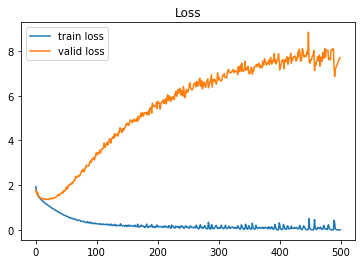

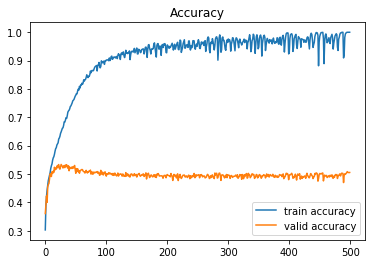

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 條件設定
- epochs = 100
- optimizer = SGD

In [10]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

opt = keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


/Users/Wei-Po/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # This is added back by InteractiveShellApp.init_path()


In [11]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100,  
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 221us/step - loss: 2.2820 - accuracy: 0.1506 - val_loss: 2.2335 - val_accuracy: 0.2045
Epoch 2/100
50000/50000 [==============================] - 9s 187us/step - loss: 2.2041 - accuracy: 0.2182 - val_loss: 2.1735 - val_accuracy: 0.2375
Epoch 3/100
50000/50000 [==============================] - 9s 179us/step - loss: 2.1483 - accuracy: 0.2513 - val_loss: 2.1219 - val_accuracy: 0.2699
Epoch 4/100
50000/50000 [==============================] - 9s 178us/step - loss: 2.1002 - accuracy: 0.2703 - val_loss: 2.0778 - val_accuracy: 0.2828
Epoch 5/100
50000/50000 [==============================] - 9s 182us/step - loss: 2.0588 - accuracy: 0.2852 - val_loss: 2.0407 - val_accuracy: 0.2977
Epoch 6/100
50000/50000 [==============================] - 9s 183us/step - loss: 2.0240 - accuracy: 0.2985 - val_loss: 2.0096 - val_accuracy: 0.3049
Epoch 7/100
50000/50000 [==============================

50000/50000 [==============================] - 9s 171us/step - loss: 1.6606 - accuracy: 0.4246 - val_loss: 1.6699 - val_accuracy: 0.4176
Epoch 56/100
50000/50000 [==============================] - 9s 175us/step - loss: 1.6572 - accuracy: 0.4255 - val_loss: 1.6645 - val_accuracy: 0.4215
Epoch 57/100
50000/50000 [==============================] - 9s 173us/step - loss: 1.6537 - accuracy: 0.4266 - val_loss: 1.6622 - val_accuracy: 0.4230
Epoch 58/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.6508 - accuracy: 0.4278 - val_loss: 1.6582 - val_accuracy: 0.4267
Epoch 59/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.6473 - accuracy: 0.4278 - val_loss: 1.6574 - val_accuracy: 0.4221
Epoch 60/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.6441 - accuracy: 0.4297 - val_loss: 1.6569 - val_accuracy: 0.4211
Epoch 61/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.6415 - accuracy: 0.4308 - val

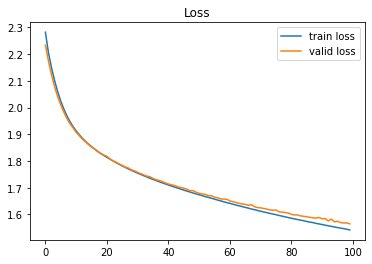

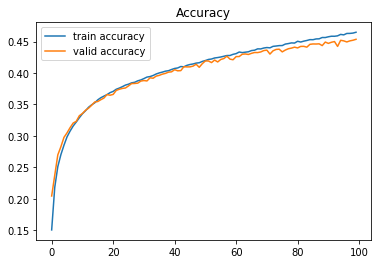

In [12]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()